#### Doc2vec learning and UMAP

# Data Exploration

In [25]:
import pickle
import numpy as np
import colorcet as cc
import matplotlib.pyplot as plt

In [2]:
#raw data
with open('/home/balla/yeoncham/data/nkis.pkl', 'rb') as f:
    data = pickle.load(f)

In [78]:
data

,보고서명,등록기관,출판년도,국문초록,핵심키워드,전체
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",과학기술정책연구원,2000,"[[지금, 경제, 구조, 변혁, 창조, 행동, 계획, 월, 각료, 회의, 결정, 라...","[바이오테크놀로지, 산업, 세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략,...","[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트, 지금, 경제,..."
1,"[EU, 연구, 개발, 정책, 동향]",과학기술정책연구원,2000,"[[EU, 미국, 일본, 세계, 과학, 기술, 발전, 주도, 국가, OECD, 연구...","[EU, 연구, 개발, 정책, 동향]","[EU, 연구, 개발, 정책, 동향, EU, 미국, 일본, 세계, 과학, 기술, 발..."
2,"[PBS, 관련, 개념, 적용, 조건]",과학기술정책연구원,2000,"[[년, 세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, 노력, 가속, 시작],...","[PBS, 개념, 적용, 조건]","[PBS, 관련, 개념, 적용, 조건, 년, 세계, 시장, 경쟁, 환경, 심화, 국..."
3,"[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방, 안, 연구]",과학기술정책연구원,2000,"[[연구, 연구, 개발, 활동, 연구, 개발, 평가, 자체, 효율, 결과, 효과, ...","[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방안]","[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방, 안, 연구, 연구, 연..."
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",과학기술정책연구원,2000,"[[인터넷, 발전, 리눅스, 확산, 기술, 개발, 환경, 개방, openness, ...","[개방, 모듈, 기술, 패러다임, 기술, 혁신, 리눅스]","[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심, 인터..."
...,...,...,...,...,...,...
21392,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",한국환경정책·평가연구원,2018,"[[연구, 생태, 보전, 생물, 다양, 보전, 증진, 생태, 지속, 가능, 이용, ...","[보호, 지역, 국립, 공원, 생태, 공학, 지역, 생태, 토지, 이용, 변화, 제주도]","[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안, 연..."
21393,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경영향평가, 개선, 방안, 연...",한국환경정책·평가연구원,2018,"[[연구, 가뭄, 지역, 농촌, 용수, 개발, 계획, 친환경, 지속, 가능, 이수,...","[전략, 환경영향평가, 농촌, 용수, 개발, 계획, 지하수, 지표수, 복합, 이용,...","[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경영향평가, 개선, 방안, 연..."
21394,"[원자력, 시설, 해체, 부지, 사용, 환경, 관리, 전략, 토양, 지하수, 분야,...",한국환경정책·평가연구원,2018,"[[고리, 호기, 영구, 정지, 해체, 확정, 월성, 호기, 조기, 폐쇄, 결정],...","[원자력, 시설, 해체, 사용, 환경, 관리, 토양, 지하수]","[원자력, 시설, 해체, 부지, 사용, 환경, 관리, 전략, 토양, 지하수, 분야,..."
21395,"[물, 환경, 개선, 용, 배수, 관리, 활용, 방안]",한국환경정책·평가연구원,2018,"[[그동안, 우리나라, 하천, 관리, 재정, 투자, 대하, 추진], [대하, 본류,...","[물, 환경, 용수, 배수, 농업용수, 비점, 오염, 수질, 부하, 물, 관리, 일원]","[물, 환경, 개선, 용, 배수, 관리, 활용, 방안, 그동안, 우리나라, 하천, ..."


In [4]:
#learned doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load('/home/balla/yeoncham/data/test') 

In [5]:
emb_vectors = np.array([model.docvecs[i] for i in range(model.docvecs.count)])
print("The number of documents is ",len(emb_vectors))
print("The dimension of embedded vectors is", len(emb_vectors[0]))

The number of documents is  21397
The dimension of embedded vectors is 200


In [63]:
#Korean - English Institute set
subject_list={'KDI국제정책대학원': 'KDIschool',
 '건축도시공간연구소': 'AURI',
 '경제·인문사회연구회': 'NRC',
 '과학기술정책연구원': 'STEPI',
 '국토연구원': 'KRIHS',
 '대외경제정책연구원': 'KIEP',
 '산업연구원': 'KIET',
 '에너지경제연구원': 'KEEI',
 '육아정책연구소': 'KICCE',
 '정보통신정책연구원': 'KISDI',
 '통일연구원': 'KINU',
 '한국개발연구원': 'KDI',
 '한국교육개발원': 'KEDI',
 '한국교육과정평가원': 'KICE',
 '한국교통연구원': 'KOTI',
 '한국노동연구원': 'KLI',
 '한국농촌경제연구원': 'KREI',
 '한국법제연구원': 'KLRI',
 '한국보건사회연구원': 'KIHASA',
 '한국여성정책연구원': 'KWDI',
 '한국조세재정연구원': 'KIPF',
 '한국직업능력개발원': 'KRIVET',
 '한국청소년정책연구원': 'NYPI',
 '한국해양수산개발원': 'KMI',
 '한국행정연구원': 'KIPA',
 '한국형사정책연구원': 'KIC',
 '한국환경정책·평가연구원': 'KEI'}

In [65]:
# korean institution name
affiliation_list = np.array(list(data['등록기관']))

In [11]:
import umap.umap_ as umap

In [13]:
#unique_affiliation = name of institutions in korean
unique_affiliation = list(set(data['등록기관']))
print(unique_affiliation)

['한국행정연구원', '과학기술정책연구원', '한국형사정책연구원', 'KDI국제정책대학원', '통일연구원', '한국개발연구원', '한국교육과정평가원', '건축도시공간연구소', '한국교통연구원', '한국해양수산개발원', '한국여성정책연구원', '한국노동연구원', '한국환경정책·평가연구원', '국토연구원', '경제·인문사회연구회', '한국보건사회연구원', '에너지경제연구원', '한국청소년정책연구원', '대외경제정책연구원', '정보통신정책연구원', '한국법제연구원', '한국조세재정연구원', '한국교육개발원', '한국직업능력개발원', '육아정책연구소', '산업연구원', '한국농촌경제연구원']


In [14]:
#unique_affiliation_eng = full english name of each institute
unique_affiliation_eng = ['Korea Institute of Public Administration','Economics, Humanities and Social Research Council','Korea Institute for Industrial Economics & Trade','Korea Institute for National Unification','Korean Women\'s Development Institute.','Korea Labour Institute','Korean Educational Development Institute ','Korea Environment Institute' ]
unique_affiliation_eng +=['Korea Research Institute for Human Settlements','Science & Technology Policy Institute','Korea Research Institute for Vocational Education and Training','Korea Rural Economic Institute','Korea Institute of Curriculum & Evaluation','Korea Information Society Development Institute','Korea Development Institute']
unique_affiliation_eng +=['National Youth Policy Institute','Korea Institute of Child Care and Education','Korea Energy Economics Institute','Architecture & Urban Research Institute','Korea Institute for International Economic Policy','Korea Maritime Institute','Korea Legislation Research Institute']
unique_affiliation_eng +=['Korea Institute of Public Finance','The Korea Transport Institute','Korean Institute of Criminology','KDI School of Public Policy and Management','Korea Institute for Health and Social Affairs']
print(unique_affiliation_eng)

['Korea Institute of Public Administration', 'Economics, Humanities and Social Research Council', 'Korea Institute for Industrial Economics & Trade', 'Korea Institute for National Unification', "Korean Women's Development Institute.", 'Korea Labour Institute', 'Korean Educational Development Institute ', 'Korea Environment Institute', 'Korea Research Institute for Human Settlements', 'Science & Technology Policy Institute', 'Korea Research Institute for Vocational Education and Training', 'Korea Rural Economic Institute', 'Korea Institute of Curriculum & Evaluation', 'Korea Information Society Development Institute', 'Korea Development Institute', 'National Youth Policy Institute', 'Korea Institute of Child Care and Education', 'Korea Energy Economics Institute', 'Architecture & Urban Research Institute', 'Korea Institute for International Economic Policy', 'Korea Maritime Institute', 'Korea Legislation Research Institute', 'Korea Institute of Public Finance', 'The Korea Transport Inst

In [16]:
#classified with related subject
unique_affiliation_classified =['한국형사정책연구원','한국법제연구원','KDI국제정책대학원','대외경제정책연구원', '통일연구원','건축도시공간연구소', '한국교통연구원',  '국토연구원', '에너지경제연구원','한국해양수산개발원', '한국농촌경제연구원','한국환경정책·평가연구원','과학기술정책연구원', '정보통신정책연구원','산업연구원','한국개발연구원', '한국조세재정연구원','한국노동연구원','한국직업능력개발원', '한국교육개발원','한국교육과정평가원','한국청소년정책연구원', '육아정책연구소', '한국여성정책연구원', '한국보건사회연구원','경제·인문사회연구회', '한국행정연구원']

#classification by NRC classification
unique_affiliation_classified2 =['한국형사정책연구원',
'한국법제연구원',
'한국행정연구원',
'통일연구원',
       
 '한국개발연구원',
'KDI국제정책대학원',
'한국조세재정연구원',
'대외경제정책연구원',
'산업연구원',#8

 
'한국교통연구원', 
'건축도시공간연구소', 
 '국토연구원',
'한국농촌경제연구원',
'한국해양수산개발원', 
'한국환경정책·평가연구원',
 '에너지경제연구원',

                                 
#16
 '정보통신정책연구원',
'한국직업능력개발원',
'과학기술정책연구원',
'한국교육개발원',
'한국교육과정평가원',
#21
'한국여성정책연구원',                                 
'한국청소년정책연구원',
'한국보건사회연구원',
 '육아정책연구소', 
'한국노동연구원',


'경제·인문사회연구회', 
]

In [67]:
#english name of unique_affiliation_classified
unique_affiliation_classified_eng= ['Korean Institute of Criminology','Korea Legislation Research Institute','KDI School of Public Policy and Management','Korea Institute for International Economic Policy','Korea Institute for National Unification','Architecture & Urban Research Institute','The Korea Transport Institute','Korea Research Institute for Human Settlements','Korea Energy Economics Institute','Korea Maritime Institute','Korea Rural Economic Institute','Korea Environment Institute','Science & Technology Policy Institute','Korea Information Society Development Institute','Korea Institute for Industrial Economics & Trade','Korea Development Institute','Korea Institute of Public Finance','Korea Labour Institute','Korea Research Institute for Vocational Education and Training','Korean Educational Development Institute ','Korea Institute of Curriculum & Evaluation', 'National Youth Policy Institute','Korea Institute of Child Care and Education','Korean Women\'s Development Institute','Korea Institute for Health and Social Affairs','National Research Council for Economics, Humanities and Social Sciences','Korea Institute of Public Administration']
print("The number of affiliation in english classified list is",len(unique_affiliation_classified_eng))

#english abbreviation name of unique_affiliation_classified2
unique_affiliation_classified_eng_abb=['KIC','KLRI','KDI School','KIEP','KINU','AURI','KOTI','KRIHS','KEEI','KMI','KREI','KEI','STEPI','KISDI','KIET','KDI','KIPF','KLI','KRIVET','KEDI','KICE','NYPI','KICCE','KWDI','KIHASA','NRC','KIPA']
print("The number of affiliation in english classified abbreviation list is",len(unique_affiliation_classified_eng_abb))

#english abbreviation name of unique_affiliation_classified2
unique_affiliation_classified_eng_abb2=[]
for i in unique_affiliation_classified2:
    unique_affiliation_classified_eng_abb2.append(subject_list[i])


The number of affiliation in english classified list is 27
The number of affiliation in english classified abbreviation list is 27


In [22]:
# index number of each research institute
index_by_affiliation = {}
for affiliation in unique_affiliation:
    index_by_affiliation[affiliation] = np.where(affiliation_list == affiliation)


## Total number of papers from each institutions

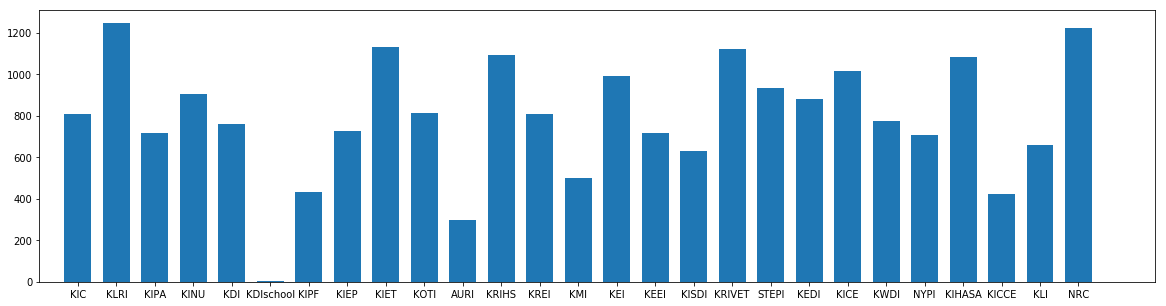

In [75]:
number_of_paper_by_inst = []
for i in unique_affiliation_classified2:
    number_of_paper_by_inst.append(len(index_by_affiliation[i][0]))
plt.figure(figsize=(20,5))
plt.bar(unique_affiliation_classified_eng_abb2,number_of_paper_by_inst,width=0.7)
plt.xlim([-1,28])
plt.show()

# Visualization : UMAP

In [77]:
import matplotlib.font_manager as fm

In [76]:
fontprop=fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=19)

In [31]:
import matplotlib.pyplot as plt
embedding1 = umap.UMAP(n_neighbors=10,
                        min_dist=0.1, 
                        metric='correlation',random_state=1000000).fit_transform(emb_vectors)



/home/balla/anaconda3/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/lib/python3.6/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/home/balla/anaconda3/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/lib/python

(0.24705882352941178, 0.0, 0.49019607843137253, 1.0)


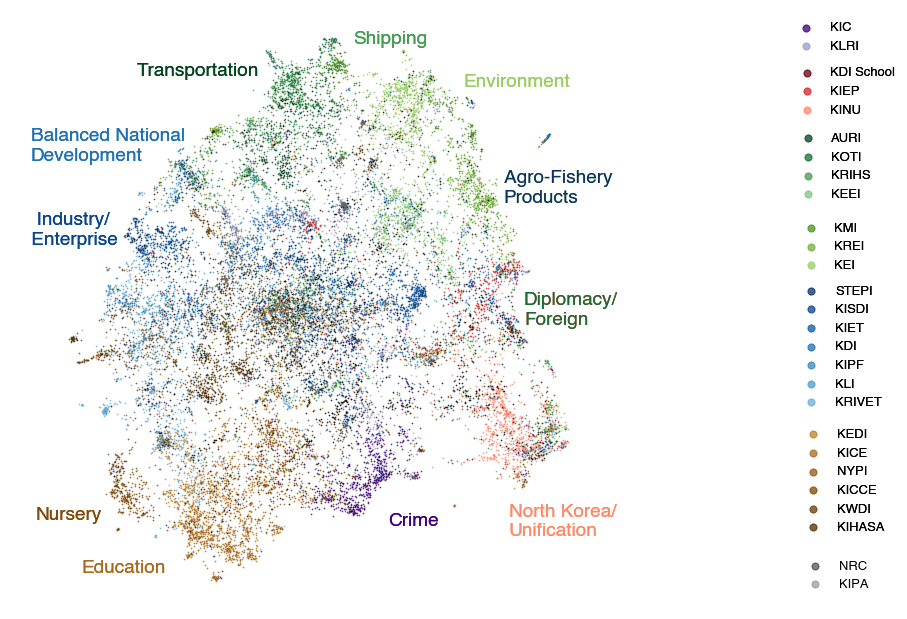

In [44]:
plt.rcParams["figure.figsize"]=(11,11)
c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 2)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 3)]
c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(1.0, 0.75, 4)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 3)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(1.0, 0.5,7 )]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]

print(c_lst[0])
for i, name in enumerate(unique_affiliation_classified):
    xs = embedding1[index_by_affiliation[name]][:,0]
    ys = embedding1[index_by_affiliation[name]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]


fs=17
plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[7])
plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[22])
plt.text(4.4,-4.8,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[4],fontweight='bold')
plt.text(4.7,-0.8,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[3])
plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[13])
plt.text(3.5,3.7,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[11])
# # plt.text(-5,-3.4,"Occupation",fontsize=20)
plt.text(-3,3.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[5])
# plt.text(-2.7,-4,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[0])
plt.text(-5.1,2.3,"Balanced National \nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[15])
# # plt.text(3.3,0,"Culture",fontsize=20)
# plt.text(1,-4.3,"Information/\nCommunications",fontsize=fs,fontproperties=fontprop,color=c_lst[14])
plt.text(4.3,1.5,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[10])
plt.text(-4.1,-5.5,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
plt.text(2,-4.6,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[0])
plt.xlim(-5.5, 6.7)

legend1 = plt.legend(handles=scatters[0:2],labels=unique_affiliation_classified_eng_abb[0:2],bbox_to_anchor=(1.3999,1),frameon=False,prop=font_name,loc='upper right')
     
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=scatters[2:5],labels=unique_affiliation_classified_eng_abb[2:5],bbox_to_anchor=(1.46, 0.925),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend2)
legend3 = plt.legend(handles=scatters[5:9],labels=unique_affiliation_classified_eng_abb[5:9], bbox_to_anchor=(1.42, 0.815),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend3)
legend4 = plt.legend(handles=scatters[9:12],labels=unique_affiliation_classified_eng_abb[9:12], bbox_to_anchor=(1.41,0.665),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend4)
legend5 = plt.legend(handles=scatters[12:19],labels=unique_affiliation_classified_eng_abb[12:19], bbox_to_anchor=(1.438,0.56),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend5)
legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.442,0.32),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend6)
legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.416,0.1),frameon=False,prop=font_name,loc='upper right')



for point in legend1.legendHandles:
    point._sizes = [50]
    
for point in legend2.legendHandles:
    point._sizes = [50]
for point in legend3.legendHandles:
    point._sizes = [50]
for point in legend4.legendHandles:
    point._sizes = [50]
for point in legend5.legendHandles:
    point._sizes = [50]
for point in legend6.legendHandles:
    point._sizes = [50]
for point in legend7.legendHandles:
    point._sizes = [50]
    

plt.xticks([]),plt.yticks([])



c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 2)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 3)]
c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(1.0, 0.75, 4)]
c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 3)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(1.0, 0.5,7 )]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.2, 0.0, 6)]
c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 2)]


for i, name in enumerate(unique_affiliation_classified):
    xs = embedding1[index_by_affiliation[name]][:,0]
    ys = embedding1[index_by_affiliation[name]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]



fs=17
plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[7])
plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[22])
plt.text(4.4,-4.8,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[4],fontweight='bold')
plt.text(4.7,-0.8,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[6])
plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[13])
plt.text(3.5,3.7,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[11])
plt.text(-3,3.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[5])
plt.text(-5.1,2.3,"Balanced National \nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[15])

plt.text(4.3,1.5,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[12])
plt.text(-4.1,-5.5,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
plt.text(2,-4.6,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[0])
plt.xlim(-5.5, 6.7)

legend1 = plt.legend(handles=scatters[0:2],labels=unique_affiliation_classified_eng_abb[0:2],bbox_to_anchor=(1.3999,1),frameon=False,prop=font_name,loc='upper right')        
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=scatters[2:5],labels=unique_affiliation_classified_eng_abb[2:5],bbox_to_anchor=(1.46, 0.925),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend2)
legend3 = plt.legend(handles=scatters[5:9],labels=unique_affiliation_classified_eng_abb[5:9], bbox_to_anchor=(1.42, 0.815),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend3)
legend4 = plt.legend(handles=scatters[9:12],labels=unique_affiliation_classified_eng_abb[9:12], bbox_to_anchor=(1.41,0.665),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend4)
legend5 = plt.legend(handles=scatters[12:19],labels=unique_affiliation_classified_eng_abb[12:19], bbox_to_anchor=(1.438,0.56),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend5)
legend6 = plt.legend(handles=scatters[19:25],labels=unique_affiliation_classified_eng_abb[19:25], bbox_to_anchor=(1.442,0.32),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend6)
legend7 = plt.legend(handles=scatters[25:27],labels=unique_affiliation_classified_eng_abb[25:27], bbox_to_anchor=(1.416,0.1),frameon=False,prop=font_name,loc='upper right')


for point in legend1.legendHandles:
    point._sizes = [50]   
for point in legend2.legendHandles:
    point._sizes = [50]
for point in legend3.legendHandles:
    point._sizes = [50]
for point in legend4.legendHandles:
    point._sizes = [50]
for point in legend5.legendHandles:
    point._sizes = [50]
for point in legend6.legendHandles:
    point._sizes = [50]
for point in legend7.legendHandles:
    point._sizes = [50]
    
plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()

## Umap_2

###### KWDI(Korean Women Development Institution) and KISDI(Korea Information Society Development Institute) are colored dark

In [60]:
unique_affiliation_classified_eng_abb2[21]

'KWDI'

(0.24705882352941178, 0.0, 0.49019607843137253, 1.0)


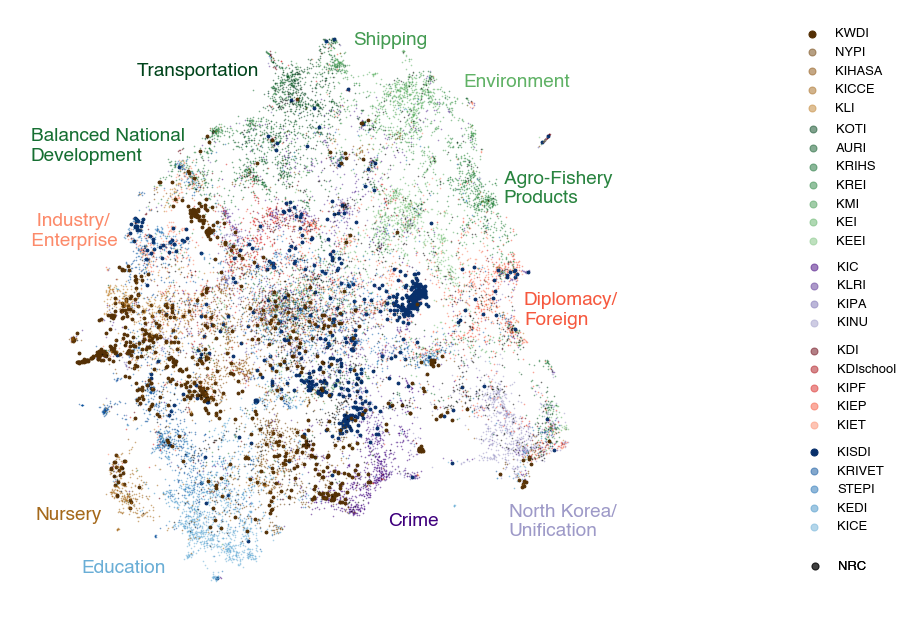

In [62]:
plt.rcParams["figure.figsize"]=(11,11)

c_lst=[plt.cm.Purples(a) for a in np.linspace(1.0, 0.5, 4)]
c_lst=c_lst+[plt.cm.Reds(a) for a in np.linspace(1.0, 0.4, 5)]
c_lst=c_lst+[plt.cm.PRGn(a) for a in np.linspace(1.0, 0.75, 7)]
#c_lst=c_lst+[plt.cm.PiYG(a) for a in np.linspace(0.9, 0.75, 3)]
c_lst=c_lst+[plt.cm.Blues(a) for a in np.linspace(1.0, 0.5,5 )]
c_lst=c_lst+[plt.cm.BrBG(a) for a in np.linspace(0.0, 0.2, 5)]
c_lst=c_lst+[plt.cm.Greys(a) for a in np.linspace(1.0, 0.65, 1)]

print(c_lst[0])
for i, name in enumerate(unique_affiliation_classified2):
    xs = embedding1[index_by_affiliation[name]][:,0]
    ys = embedding1[index_by_affiliation[name]][:,1]
    if i==0:
        scatters=[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]
    elif name=='한국여성정책연구원':
        scatters=scatters+[plt.scatter(xs, ys, s=8,color=c_lst[i],label=name,alpha=1)]
    elif name == '정보통신정책연구원':
        scatters=scatters+[plt.scatter(xs, ys, s=8,color=c_lst[i],label=name,alpha=1)]
    else:
        scatters = scatters+[plt.scatter(xs, ys, s=0.4,color=c_lst[i],label=name,alpha=0.5)]


fs=17
plt.text(1.3, 4.5,"Shipping", fontsize=fs,fontproperties=fontprop,color=c_lst[13])
plt.text(-5,-4.5,"Nursery",fontsize=fs,fontproperties=fontprop,color=c_lst[24])
plt.text(4.4,-4.8,"North Korea/\nUnification",fontsize=fs,fontproperties=fontprop,color=c_lst[3],fontweight='bold')
plt.text(4.7,-0.8,"Diplomacy/\nForeign",fontsize=fs,fontproperties=fontprop,color=c_lst[7])
plt.text(-5.2,0.7,"  Industry/\n Enterprise",fontsize=fs,fontproperties=fontprop,color=c_lst[8])
plt.text(3.5,3.7,"Environment",fontsize=fs,fontproperties=fontprop,color=c_lst[14])
plt.text(-3,3.9,"Transportation", fontsize=fs,fontproperties=fontprop,color=c_lst[9])
plt.text(-5.1,2.3,"Balanced National \nDevelopment",fontsize=fs,fontproperties=fontprop,color=c_lst[11])
plt.text(4.3,1.5,"Agro-Fishery \nProducts",fontsize=fs,fontproperties=fontprop,color=c_lst[12])
plt.text(-4.1,-5.5,"Education",fontsize=fs,fontproperties=fontprop,color=c_lst[20])
plt.text(2,-4.6,"Crime",fontsize=fs,fontproperties=fontprop,color=c_lst[0])
plt.xlim(-5.5, 6.7)


legend1 = plt.legend(handles=scatters[0:4],labels=unique_affiliation_classified_eng_abb2[0:4],bbox_to_anchor=(1.416,0.6),frameon=False,prop=font_name,loc='upper right')       
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=scatters[4:9],labels=unique_affiliation_classified_eng_abb2[4:9],bbox_to_anchor=(1.462, 0.46),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend2)
legend3 = plt.legend(handles=scatters[9:16],labels=unique_affiliation_classified_eng_abb2[9:16], bbox_to_anchor=(1.428, 0.83),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend3)
legend4 = plt.legend(handles=scatters[16:21],labels=unique_affiliation_classified_eng_abb2[16:21], bbox_to_anchor=(1.442,0.29),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend4)
legend5 = plt.legend(handles=scatters[21:26],labels=unique_affiliation_classified_eng_abb2[21:26], bbox_to_anchor=(1.4395,0.99),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend5)
legend6 = plt.legend(handles=scatters[26:27],labels=unique_affiliation_classified_eng_abb2[26:27], bbox_to_anchor=(1.413,0.1),frameon=False,prop=font_name,loc='upper right')
plt.gca().add_artist(legend6)
#legend7 = plt.legend(handles=scatters[21:22],labels=unique_affiliation_classified_eng_abb[21:22], bbox_to_anchor=(1.416,1),frameon=False,prop=font_name,loc='upper right')



for point in legend1.legendHandles:
    point._sizes = [50]   
for point in legend2.legendHandles:
    point._sizes = [50]
for point in legend3.legendHandles:
    point._sizes = [50]
for point in legend4.legendHandles:
    point._sizes = [50]
for point in legend5.legendHandles:
    point._sizes = [50]
for point in legend6.legendHandles:
    point._sizes = [50]
for point in legend7.legendHandles:
    point._sizes = [50]
    

    
plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()

